In [1]:
import pandas as pd
from sklearn import decomposition, datasets
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import pandas as pd # for using pandas daraframe
import numpy as np # for som math operations
from sklearn.preprocessing import StandardScaler # for standardizing the Data
from sklearn.decomposition import PCA # for PCA calculation
import matplotlib.pyplot as plt # for plotting

In [2]:
df = pd.read_csv(r'C:\Users\PC\Cookies\Desktop\spinewise project\059-COMBINED-2022-11-7-13-2-45-1667849080-v1.4.3+lucina-buzz.csv')

In [3]:
df.head()

,Unnamed: 0,ts_r,acc_x_r,acc_y_r,acc_z_r,temp_r,gyr_x_r,gyr_y_r,gyr_z_r,mag_x_r,...,temp_n,gyr_x_n,gyr_y_n,gyr_z_n,mag_x_n,mag_y_n,mag_z_n,kal_status_n,alpha_n,beta_n
0,0,77028.0,0.976074,-0.250977,-0.122070,3952.0,-0.640869,1.556396,-0.213623,-6.0,...,3728.0,-1.892090,0.091553,0.366211,6248.0,-6246.0,-10420.0,0.0,-705.0,1792.0
1,1,77029.0,0.973145,-0.246826,-0.119873,3936.0,-0.457764,1.464844,0.061035,-6.0,...,3776.0,-1.617432,0.061035,0.488281,6237.0,-6316.0,-10856.0,0.0,-705.0,1792.0
2,2,77030.0,0.976562,-0.247559,-0.127441,4080.0,-0.091553,1.556396,0.152588,11144.0,...,3760.0,-1.708984,-0.244141,0.946045,6237.0,-6316.0,-10856.0,0.0,-705.0,1792.0
3,3,77031.0,0.973633,-0.248291,-0.121582,3968.0,0.305176,1.586914,0.030518,11144.0,...,3696.0,-1.617432,-0.030518,0.518799,6237.0,-6243.0,-10409.0,0.0,-705.0,1792.0
4,4,77032.0,0.973145,-0.251221,-0.125244,3968.0,-0.244141,1.495361,-0.274658,11139.0,...,3824.0,-1.342773,-0.335693,0.427246,6237.0,-6243.0,-10409.0,0.0,-705.0,1792.0


In [4]:
df.shape

(176916, 29)

In [5]:
df['difference_r'] = df['beta_r'] - df['alpha_r']
df['difference_r']

0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
           ...  
176911    1727.0
176912    1727.0
176913    1727.0
176914    1727.0
176915    1727.0
Name: difference_r, Length: 176916, dtype: float64

In [6]:
df['difference_n'] = df['beta_n'] - df['alpha_n']
df['difference_n']

0         2497.0
1         2497.0
2         2497.0
3         2497.0
4         2497.0
           ...  
176911    2497.0
176912    2497.0
176913    2497.0
176914    2497.0
176915    2497.0
Name: difference_n, Length: 176916, dtype: float64

In [7]:
df.shape

(176916, 31)

<AxesSubplot:xlabel='ts_r'>

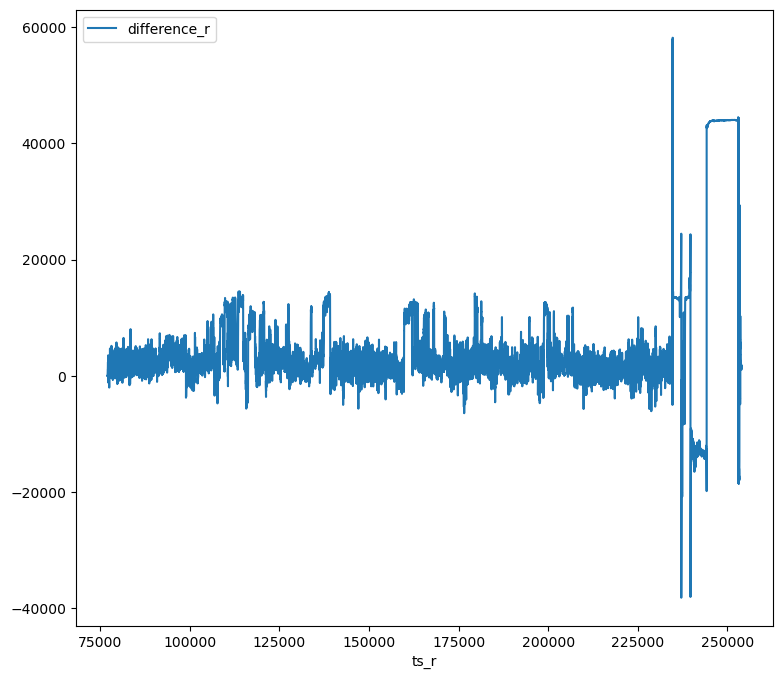

In [8]:
df.plot(x="ts_r", y=["difference_r"], kind="line", figsize=(9, 8))

In [9]:
df = df.drop(['alpha_r','beta_r','alpha_n','beta_n','ts_r','Unnamed: 0'], axis=1)

In [10]:
df.dropna(how="any", inplace=True)

In [11]:
df.shape

(176916, 25)

In [12]:
#print(df1.columns)

In [13]:
#df1.shape

In [14]:
std_slc = StandardScaler()
df_std = std_slc.fit_transform(df)

print(df_std.shape)
print(df_std)

(176916, 25)
[[ 0.33124808 -0.54784566 -0.24357667 ... -1.72421088 -0.44594794
   0.        ]
 [ 0.32284056 -0.53204386 -0.23792096 ... -1.72421088 -0.44594794
   0.        ]
 [ 0.33264933 -0.53483241 -0.25740175 ... -1.72421088 -0.44594794
   0.        ]
 ...
 [ 0.50290163 -0.2959463  -0.54772835 ...  1.78091472 -0.27641772
   0.        ]
 [ 0.50079975 -0.22995052 -0.35103522 ...  1.78091472 -0.27641772
   0.        ]
 [ 0.350165    0.42628915 -0.50688154 ...  1.78091472 -0.27641772
   0.        ]]


In [15]:
#df_std = df_std.dropna

In [16]:
pca = PCA()
df_pca = pca.fit(df_std)

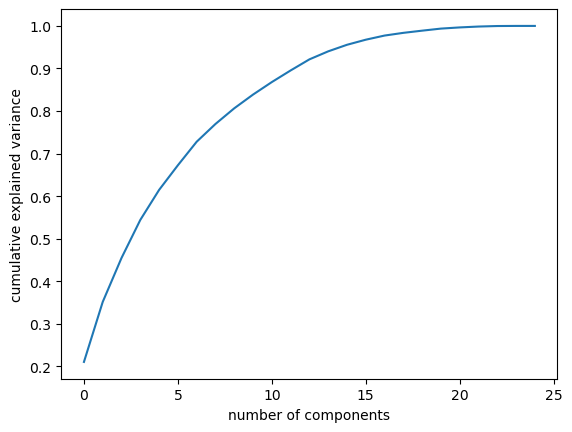

In [19]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [20]:
pca = decomposition.PCA(n_components=12)
df_std_pca = pca.fit_transform(df_std)

print(df_std_pca.shape)
print(df_std_pca)

(176916, 12)
[[ 1.21282316  1.42709415  0.19881966 ...  0.78011497 -2.0835132
   1.51939431]
 [ 1.2193834   1.51431343  0.1810747  ...  0.87917865 -2.05125015
   1.49616543]
 [-0.18212666 -0.11585564  0.12945662 ...  0.90659852 -0.37485591
  -0.39753644]
 ...
 [ 0.56981574  0.33378363  0.70311017 ...  1.63534431  0.33694115
  -0.74144404]
 [ 0.66805599  0.32167076  0.61919651 ...  1.58575697  0.41361932
  -0.66895643]
 [ 0.69408753  0.14527243  0.62566647 ...  2.04014783  0.43276548
  -0.13539489]]


In [29]:
df1 = pd.DataFrame(pca.components_, columns = df.columns)

In [25]:
n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = df.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [26]:
print(most_important_names)

['acc_z_r', 'acc_x_n', 'gyr_x_r', 'temp_r', 'acc_y_r', 'gyr_z_r', 'gyr_z_r', 'mag_x_r', 'gyr_y_r', 'acc_y_r', 'acc_y_n', 'gyr_y_n']


In [31]:
df1= pd.DataFrame(df_std_pca, columns = most_important_names)
df1

,acc_z_r,acc_x_n,gyr_x_r,temp_r,acc_y_r,gyr_z_r,gyr_z_r,mag_x_r,gyr_y_r,acc_y_r,acc_y_n,gyr_y_n
0,1.212823,1.427094,0.198820,3.935011,-0.413664,2.927896,1.854762,-6.327420,0.789781,0.780115,-2.083513,1.519394
1,1.219383,1.514313,0.181075,3.991273,-0.348266,2.847541,1.816450,-6.310261,0.796234,0.879179,-2.051250,1.496165
2,-0.182127,-0.115856,0.129457,4.810586,2.557829,-1.094797,-0.765566,1.025790,-0.173663,0.906599,-0.374856,-0.397536
3,-0.212947,-0.211049,0.120686,4.625707,2.457695,-1.040348,-0.743991,0.989200,-0.182450,0.795408,-0.475225,-0.411121
4,-0.147539,-0.215684,0.127913,4.765059,2.504705,-0.991201,-0.723866,1.019384,-0.177768,0.820116,-0.374170,-0.362763
...,...,...,...,...,...,...,...,...,...,...,...,...
176911,0.708263,0.421069,0.829139,-1.089190,1.811353,0.142071,0.572285,1.392893,0.190337,1.842351,0.408436,-0.260752
176912,0.693661,0.356795,0.999093,-1.159050,2.010527,0.404178,0.375178,1.297957,0.131303,1.709945,0.314433,-0.477947
176913,0.569816,0.333784,0.703110,-1.264429,1.984498,0.658703,-0.165818,1.249213,0.388454,1.635344,0.336941,-0.741444
176914,0.668056,0.321671,0.619197,-1.221505,2.028882,0.632240,-0.233079,1.124000,0.989410,1.585757,0.413619,-0.668956


In [32]:
df2 = df1.rolling(window=25).mean()
print(df1)

         acc_z_r   acc_x_n   gyr_x_r    temp_r   acc_y_r   gyr_z_r   gyr_z_r  \
0       1.212823  1.427094  0.198820  3.935011 -0.413664  2.927896  1.854762   
1       1.219383  1.514313  0.181075  3.991273 -0.348266  2.847541  1.816450   
2      -0.182127 -0.115856  0.129457  4.810586  2.557829 -1.094797 -0.765566   
3      -0.212947 -0.211049  0.120686  4.625707  2.457695 -1.040348 -0.743991   
4      -0.147539 -0.215684  0.127913  4.765059  2.504705 -0.991201 -0.723866   
...          ...       ...       ...       ...       ...       ...       ...   
176911  0.708263  0.421069  0.829139 -1.089190  1.811353  0.142071  0.572285   
176912  0.693661  0.356795  0.999093 -1.159050  2.010527  0.404178  0.375178   
176913  0.569816  0.333784  0.703110 -1.264429  1.984498  0.658703 -0.165818   
176914  0.668056  0.321671  0.619197 -1.221505  2.028882  0.632240 -0.233079   
176915  0.694088  0.145272  0.625666 -1.102386  1.783854  0.278871 -0.109220   

         mag_x_r   gyr_y_r   acc_y_r   